# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1020.
Date:                Tue, 06 May 2025   Prob (F-statistic):           4.61e-42
Time:                        15:57:17   Log-Likelihood:                 2.5345
No. Observations:                  50   AIC:                             2.931
Df Residuals:                      46   BIC:                             10.58
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9295      0.082     60.310      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.42611012  4.88833219  5.31484542  5.68141409  5.97254904  6.18405248
  6.32370764  6.41000008  6.46908048  6.53046825  6.62220148  6.76623043
  6.97481113  7.24849178  7.57602263  7.93620434  8.30137093  8.64193526
  8.93125005  9.14998604  9.28930766  9.35232472  9.35358148  9.31666704
  9.27033977  9.24380235  9.26190385  9.34105713  9.48654221  9.69163884
  9.93873054 10.20219901 10.45263309 10.66166097 10.80661157 10.87423935
 10.86290051 10.78282305 10.65442637 10.5049664  10.3640575  10.25880696
 10.20936132 10.22559634 10.30549446 10.43547628 10.59263158 10.74848348
 10.87366702 10.94275382]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.92645263 10.79155189 10.55549101 10.25801222  9.95143026  9.68782393
  9.50628537  9.42334895  9.42894306  9.48885603]


## Plot comparison

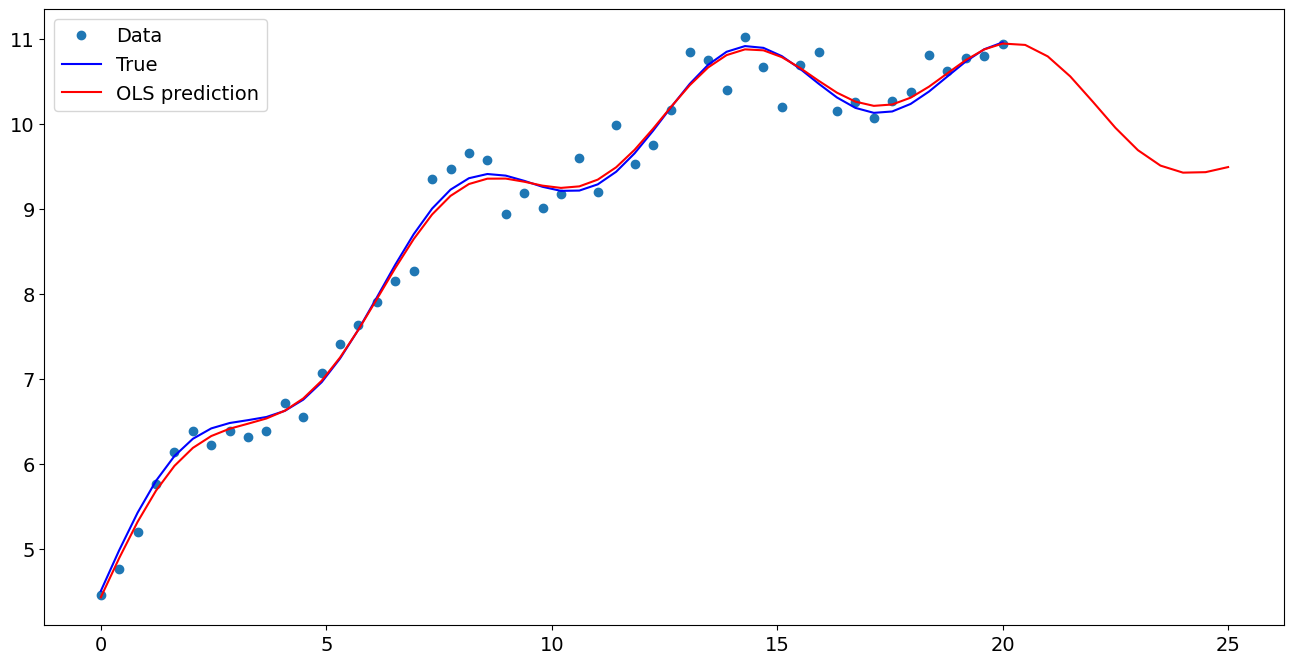

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.929454
x1                  0.506870
np.sin(x1)          0.444699
I((x1 - 5) ** 2)   -0.020134
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.926453
1    10.791552
2    10.555491
3    10.258012
4     9.951430
5     9.687824
6     9.506285
7     9.423349
8     9.428943
9     9.488856
dtype: float64